In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.cluestering import cluestering
from src.utils import *

from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2

sns.set()

# Iris

## Original

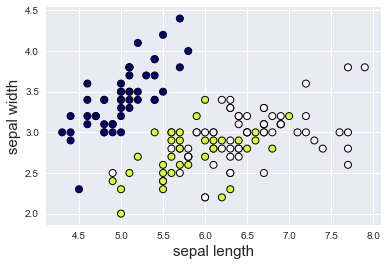

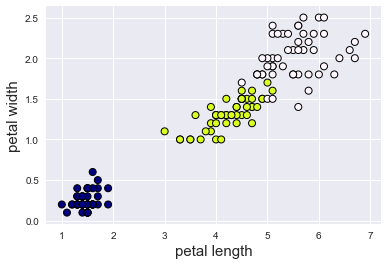

In [2]:
iris = load_iris_to_df()
plot_2d(iris, 'sepal_length', 'sepal_width', comment="org")
plot_2d(iris, 'petal_length', 'petal_width', comment="org")

## EM

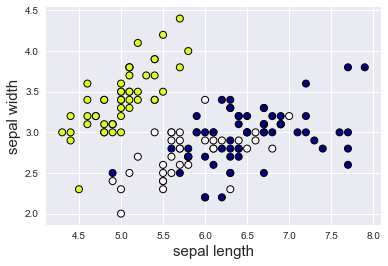

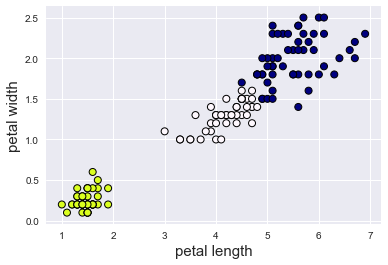

In [3]:
iris_data = iris.drop('label', 1)
iris_kmeans = cluestering(iris_data, 'EM', 3)
plot_2d(iris_kmeans, 'sepal_length', 'sepal_width', comment="EM")
plot_2d(iris_kmeans, 'petal_length', 'petal_width', comment="EM")

## Kmeans

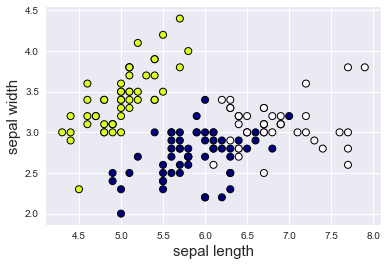

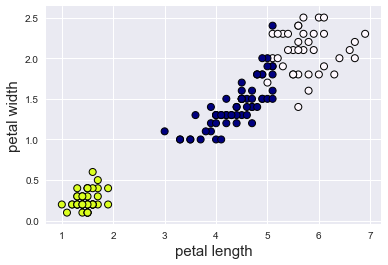

In [4]:
iris_data = iris.drop('label', 1)
iris_kmeans = cluestering(iris_data, 'kmeans', 3)
plot_2d(iris_kmeans, 'sepal_length', 'sepal_width', comment="kmeans")
plot_2d(iris_kmeans, 'petal_length', 'petal_width', comment="kmeans")

# Starcraft

## Original

In [5]:
sc = load_starcraft_to_df()
min_sc, max_sc = np.min(sc, 0), np.max(sc, 0)
sc[:] -= min_sc
sc[:] /= max_sc - min_sc

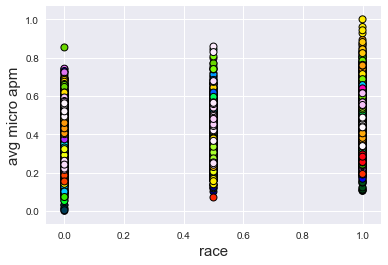

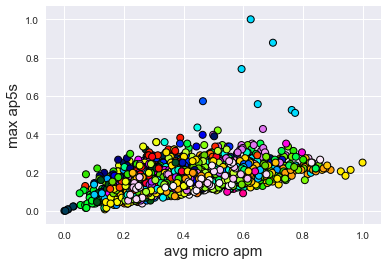

In [6]:
plot_2d(sc, 'race', 'avg_micro_apm', comment="org")
plot_2d(sc, 'avg_micro_apm', 'max_ap5s', comment="org")

/home/nicolas/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


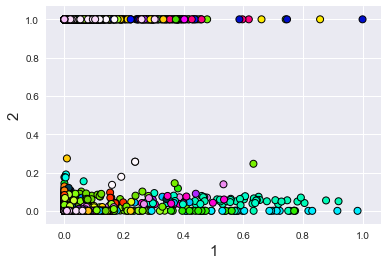

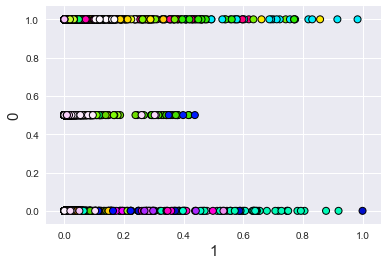

/usr/lib/python3/dist-packages/mpl_toolkits/mplot3d/axes3d.py:120: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  self.axesPatch.set_linewidth(0)
/usr/lib/python3/dist-packages/mpl_toolkits/mplot3d/axes3d.py:2343: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  cstr = cbook.is_string_like(c) or cbook.is_sequence_of_strings(c)
/usr/lib/python3/dist-packages/mpl_toolkits/mplot3d/axes3d.py:2343: MatplotlibDeprecationWarning: The is_sequence_of_strings function was deprecated in version 2.1.
  cstr = cbook.is_string_like(c) or cbook.is_sequence_of_strings(c)
/home/nicolas/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:540: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(obj) and not isinstance(obj, np.ndarray):
/home/nicolas/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:547: MatplotlibDeprec

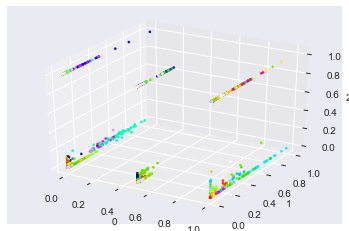

In [7]:
b = SelectKBest(k=3)
y = sc.get('label')
x = sc.drop('label', 1)
x_new = b.fit_transform(x,y)
x_new = pd.DataFrame(x_new, columns=["0", "1", "2"])
x_new = x_new.assign(label=y)
plot_2d(x_new, '1', '2', comment="org")
plot_2d(x_new, '1', '0', comment="org")
plot_3d(x_new, '0', '1', '2', comment="org")


In [8]:
print(b.get_support())
for i, (k, n) in enumerate(zip(b.get_support(), x.columns)):
    if k == True:
        print(i, n)

[False  True False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]
1 race
24 count_hotkey92
37 first_time_hotkey40


## Kmeans

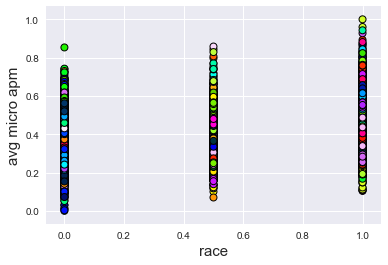

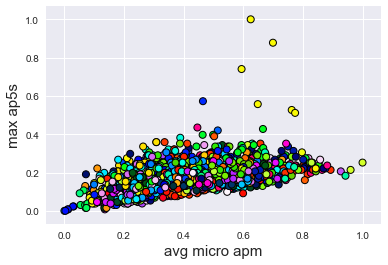

In [9]:
sc_nl = sc.drop('label', 1)
sc_kmeans = cluestering(sc_nl, 'kmeans', 200)
plot_2d(sc_kmeans, 'race', 'avg_micro_apm', comment="kmeans")
plot_2d(sc_kmeans, 'avg_micro_apm', 'max_ap5s', comment="kmeans")

## EM

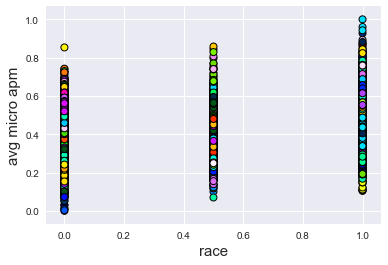

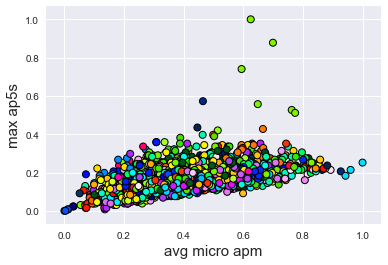

In [10]:
sc_nl = sc.drop('label', 1)
sc_kmeans = cluestering(sc_nl, 'EM', 200)
plot_2d(sc_kmeans, 'race', 'avg_micro_apm', comment="EM")
plot_2d(sc_kmeans, 'avg_micro_apm', 'max_ap5s', comment="EM")